In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =pd.read_csv("Electricity Consumption.csv")
data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [4]:
data.DATE = pd.to_datetime(data.DATE, format = "%m/%d/%Y")

In [5]:
data.set_index(data.DATE, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


<AxesSubplot:xlabel='DATE'>

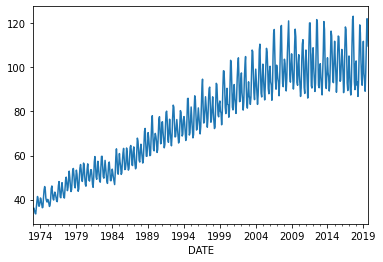

In [7]:
data.Electricty_Consumption_in_TW.plot()

### The data is NOT stationary

In [8]:
data["Month"] = data.DATE.dt.month
data["Year"] = data.DATE.dt.year

In [9]:
data

,DATE,Electricty_Consumption_in_TW,Month,Year
DATE,,,,
1973-01-01,1973-01-01,35.9728,1,1973
1973-02-01,1973-02-01,36.1334,2,1973
1973-03-01,1973-03-01,35.0625,3,1973
1973-04-01,1973-04-01,33.8416,4,1973
1973-05-01,1973-05-01,33.5107,5,1973
...,...,...,...,...
2019-05-01,2019-05-01,97.5860,5,2019
2019-06-01,2019-06-01,110.8580,6,2019
2019-07-01,2019-07-01,122.1014,7,2019


<AxesSubplot:xlabel='Year'>

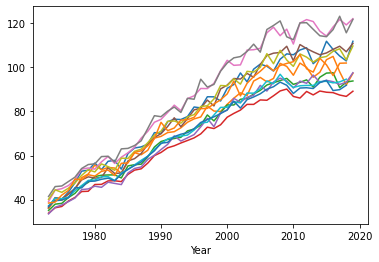

In [10]:
pd.pivot_table(data = data, values = "Electricty_Consumption_in_TW", index = "Year", columns = "Month").plot(legend = False)

<AxesSubplot:xlabel='Month'>

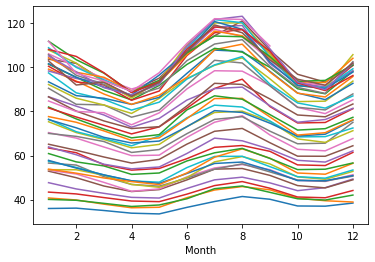

In [11]:
pd.pivot_table(data = data, values = "Electricty_Consumption_in_TW", index = "Month", columns = "Year").plot(legend = False)

# Apply Seasonal decomposition

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
sd = seasonal_decompose(x = data.Electricty_Consumption_in_TW, model = "multiplicative")

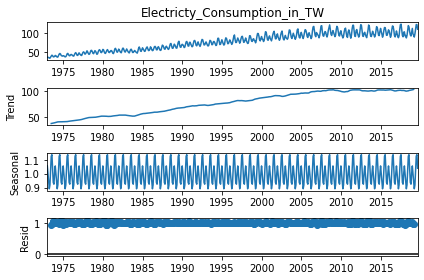

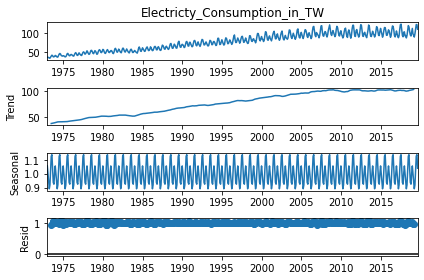

In [14]:
sd.plot()

In [15]:
pd.concat([sd.observed, sd.trend, sd.seasonal, sd.resid], axis =1).tail(21)

,Electricty_Consumption_in_TW,trend,seasonal,resid
DATE,,,,
2018-01-01,102.9398,101.072950,1.055358,0.965047
2018-02-01,92.0095,100.657704,0.996086,0.917675
2018-03-01,93.3526,100.134792,0.945337,0.986176
2018-04-01,86.8386,99.975558,0.890877,0.974992
2018-05-01,93.2361,100.110062,0.918780,1.013666
2018-06-01,107.1009,100.197979,1.030843,1.036911
2018-07-01,119.2874,100.573683,1.125749,1.053582
2018-08-01,115.7108,101.166550,1.136105,1.006743
2018-09-01,103.4070,101.408408,1.038776,0.981644


### Trend , Seasonality and Residual are present since the value of seasonal and residual component is close to 1

## Autocorrelation

In [16]:
from statsmodels.tsa.stattools import acf, pacf

In [17]:
acf(data.Electricty_Consumption_in_TW)

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065, 0.74640927, 0.79162819,
       0.81316289, 0.78520664, 0.73310236, 0.71201771, 0.74767556,
       0.80929857, 0.83784094, 0.79920595, 0.72847833, 0.6849164 ,
       0.69784608])

In [18]:
pacf(data.Electricty_Consumption_in_TW, method = "ols")

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ,
       -0.12035626, -0.01871735, -0.05644169, -0.00463219, -0.06631367,
        0.0409564 ,  0.02993122, -0.04493081,  0.10883131,  0.00458799,
        0.13946451,  0.10968151, -0.18123046, -0.01554567, -0.0029174 ,
       -0.07123474])

In [19]:
import statsmodels.tsa.api as smt

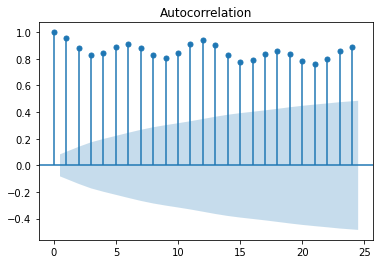

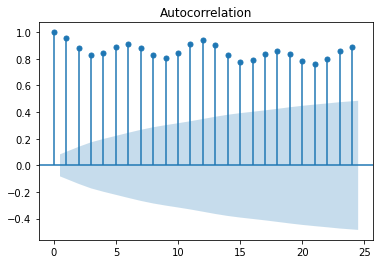

In [20]:
smt.graphics.plot_acf(data.Electricty_Consumption_in_TW, lags = 24)

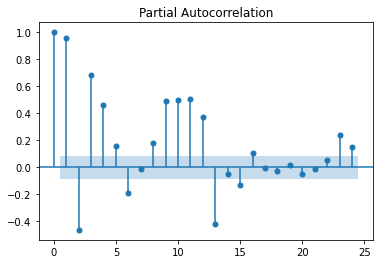

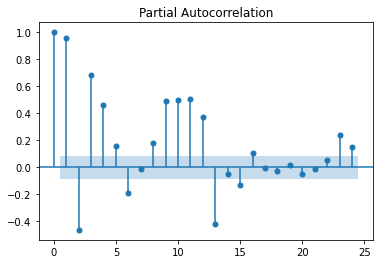

In [21]:
smt.graphics.plot_pacf(data.Electricty_Consumption_in_TW, lags = 24, method = "ols")

# ADF Test

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
adfuller(data.Electricty_Consumption_in_TW)

(-1.7405933729832572,
 0.4103281604468614,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

### The P-value is 0.41 which is NOT less than 0.05 so we accept the NULL Hypothesis. This means that series is NOT stationary

### We have to transform the data to make the series Stationary

In [24]:
adfuller(np.log(data.Electricty_Consumption_in_TW))

(-3.0018666788915644,
 0.0347204433006561,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

### The P value is 0.035 which is less than 0.05 so we can reject the NULL Hypothesis. This means that The series is Stationary

<AxesSubplot:xlabel='DATE'>

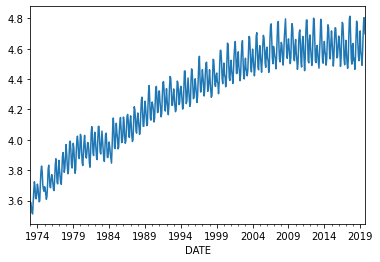

In [25]:
np.log(data.Electricty_Consumption_in_TW).plot()

# Moving Average

In [26]:
forecast = data.Electricty_Consumption_in_TW.rolling(window = 3).mean().dropna().tail(12)
forecast

DATE
2018-10-01    104.589000
2018-11-01     96.654700
2018-12-01     96.181800
2019-01-01    101.916067
2019-02-01    103.722133
2019-03-01    101.006233
2019-04-01     93.451333
2019-05-01     93.537967
2019-06-01     99.210433
2019-07-01    110.181800
2019-08-01    118.245300
2019-09-01    117.865633
Name: Electricty_Consumption_in_TW, dtype: float64

In [27]:
actual = data.Electricty_Consumption_in_TW.tail(12)
actual

DATE
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [28]:
print("MAPE-", np.mean((np.abs(actual - forecast))/actual)*100)

MAPE- 6.997772996910663


### The error value is high so we get less accuracy using Moving Average Technique

<AxesSubplot:xlabel='DATE'>

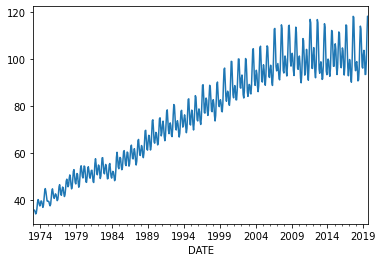

In [29]:
data.Electricty_Consumption_in_TW.rolling(window = 3).mean().plot()

# Exponential Smoothing (ETS or Holtwinter method)

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
ets = ExponentialSmoothing(data.Electricty_Consumption_in_TW, trend = 'mul', seasonal='mul', seasonal_periods=12)

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [32]:
ets = ets.fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma

<ipython-input-32-ea8a0d3894ee>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [33]:
print(ets.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                     ExponentialSmoothing   SSE                           3675.183
Optimized:                                 True   AIC                           1086.477
Trend:                           Multiplicative   BIC                           1155.752
Seasonal:                        Multiplicative   AICC                          1087.739
Seasonal Periods:                            12   Date:                 Tue, 19 Oct 2021
Box-Cox:                                  False   Time:                         11:41:46
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.100

In [34]:
ets.forecast(steps = 27) # Forecast for year 2020 & 2021

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
2020-10-01    105.589372
2020-11-01    103.646404
2020-12-01    115.198272
2021-01-01    122.711635
2021-02-01    113.067756
2021-03-01    108.937106
2021-04-01    102.861054
2021-05-01    110.605994
2021-06-01    127.619485
2021-07-01    141.195084
2021-08-01    140.692751
2021-09-01    126.814209
2021-10-01    113.186057
2021-11-01    111.103302
2021-12-01    123.486275
Freq: MS, dtype: float64

In [35]:
#Split the data 
train = data.Electricty_Consumption_in_TW[:'2019-01-01']
test = data.Electricty_Consumption_in_TW['2019-02-01':]

In [36]:
#Error calculation on the data of last one year
np.mean(np.abs(data.Electricty_Consumption_in_TW['2018-10-01':] - ets.fittedvalues['2018-10-01':])/train['2018-10-01':] )

0.04745507399558255

In [37]:
ets = ExponentialSmoothing(train, trend = 'mul', seasonal='mul', seasonal_periods=12)

ets = ets.fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-37-2bb006caf922>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma


In [38]:
fct = ets.forecast(steps=8)

In [39]:
# Error calculation on the test data (for 6 months)
np.mean(np.abs(test-fct)/test)

0.009800885438420292

In [40]:
#Error calcuation on the train data of last one year
np.mean(np.abs(train['2018-12-01':] - ets.fittedvalues['2018-12-01':])/train['2018-12-01':] )

0.05380464863702399

### Finding the best values of alpha, beta, gamma

In [41]:
#Finding the best values of alpha, beta, gamma
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])


In [42]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [43]:
auto_hwm(data.Electricty_Consumption_in_TW['2018-01-01':], val_split_date ='2019-02-01' , alpha=alpha, beta=beta, gamma=gamma, 
              trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 729 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.9}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.7}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.6}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.2}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.7}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.9}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

 {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.2}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.7}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

 {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.9}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

 {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.1}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.1}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.9}


<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmode

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.3}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

 {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.3}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

 {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.7}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.1}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.7}


<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmode

Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.2}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.4}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.7}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.4}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.9}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.4}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.7}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.1}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.3}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.5}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.1}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.3}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.5}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

 {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.9}


<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmode

Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.2}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.4}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.7}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.2}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.3}
Checking for

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

 {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.8}


C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\s

Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.8}
Checking f

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-dcd554cb0700>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

{'alpha': 0.9, 'beta': 0.9, 'gamma': 0.9, 'mae': array(0.00557212)}

### Applying best values of alpha, beta and gamma
##### 'alpha': 0.9, 'beta': 0.9, 'gamma': 0.9

In [48]:
ets = ExponentialSmoothing(data.Electricty_Consumption_in_TW['2018-01-01':], trend = 'mul', seasonal='mul', seasonal_periods=12)

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [49]:
ets = ets.fit(smoothing_level=0.9, smoothing_slope=0.9, smoothing_seasonal=0.9)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma

<ipython-input-49-c3cc0e501bde>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=0.9, smoothing_slope=0.9, smoothing_seasonal=0.9)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma


In [50]:
print(ets.summary())

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                   21
Model:                     ExponentialSmoothing   SSE                             19.266
Optimized:                                 True   AIC                             30.190
Trend:                           Multiplicative   BIC                             46.902
Seasonal:                        Multiplicative   AICC                           372.190
Seasonal Periods:                            12   Date:                 Tue, 19 Oct 2021
Box-Cox:                                  False   Time:                         11:51:23
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.900

In [51]:
ets.forecast(steps = 27) # Forecast for year 2020 & 2021

2019-10-01    101.676330
2019-11-01    100.105060
2019-12-01    112.785642
2020-01-01    125.688919
2020-02-01    111.180731
2020-03-01    108.954345
2020-04-01    105.906678
2020-05-01    114.621471
2020-06-01    130.010680
2020-07-01    144.340142
2020-08-01    144.858692
2020-09-01    129.576791
2020-10-01    120.051151
2020-11-01    118.195924
2020-12-01    133.168125
2021-01-01    148.403266
2021-02-01    131.273176
2021-03-01    128.644441
2021-04-01    125.046002
2021-05-01    135.335722
2021-06-01    153.506051
2021-07-01    170.425116
2021-08-01    171.037377
2021-09-01    152.993750
2021-10-01    141.746648
2021-11-01    139.556146
2021-12-01    157.234105
Freq: MS, dtype: float64

In [52]:
#Split the data 
train = data.Electricty_Consumption_in_TW[:'2019-01-01']
test = data.Electricty_Consumption_in_TW['2019-02-01':]

In [58]:
train

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
Name: Electricty_Consumption_in_TW, Length: 553, dtype: float64

In [53]:
#Error calculation on the data of last one year
np.mean(np.abs(data.Electricty_Consumption_in_TW['2018-10-01':] - ets.fittedvalues['2018-10-01':])/train['2018-10-01':] )

0.0013907320359333982

In [63]:
ets = ExponentialSmoothing(train['2018-01-01':], trend = 'mul', seasonal='mul', seasonal_periods=12)

ets = ets.fit(smoothing_level=0.9, smoothing_slope=0.9, smoothing_seasonal=0.9)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-63-ce5e20a055e3>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets = ets.fit(smoothing_level=0.9, smoothing_slope=0.9, smoothing_seasonal=0.9)  # alpha = smoothing_level, smoothening_slope=Beta, smoothening_seasonal = gamma


In [64]:
fct = ets.forecast(steps=8)
fct

2019-02-01     99.974032
2019-03-01    101.432014
2019-04-01     94.353064
2019-05-01    101.303043
2019-06-01    116.366324
2019-07-01    129.605945
2019-08-01    125.718990
2019-09-01    112.350330
Freq: MS, dtype: float64

In [65]:
test

DATE
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [66]:
# Error calculation on the test data (for 6 months)
np.mean(np.abs(test-fct)/test)

0.04645262029778556

In [72]:
#Error calcuation on the train data of last one year
np.mean(np.abs(train['2018-01-01':] - ets.fittedvalues['2018-01-01':])/train['2018-01-01':] )

1.383832704000254e-06

## The error is too low which indicates high accuracy on applying ETS Technique

# ARIMA (Auto Regressive Integrated Moving Average)

In [104]:
#data - total data
#train, test

adfuller(np.log(data.Electricty_Consumption_in_TW))

# original = ts
# stationary series = log(data.Electricty_Consumption_in_TW)
# input for ARIMA: Yt = ln_ts, d=2

(-3.0018666788915644,
 0.0347204433006561,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

In [105]:
ln_electricity = np.log(data.Electricty_Consumption_in_TW).diff(2).dropna()   #Stationary series

ln_data = np.log(data.Electricty_Consumption_in_TW)  #input to model

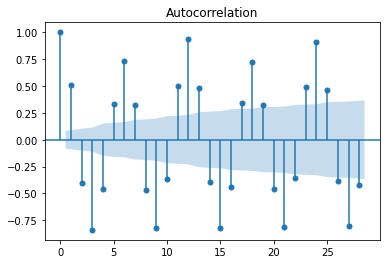

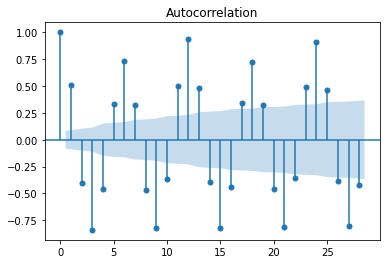

In [106]:
smt.graphics.plot_acf(ln_electricity)

In [107]:
smt.acf(ln_electricity)

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.51136481, -0.40087667, -0.83973587, -0.45913422,
        0.33677157,  0.73454612,  0.32558877, -0.4653942 , -0.823068  ,
       -0.36984991,  0.50103671,  0.94043195,  0.48087604, -0.39233303,
       -0.82241194, -0.44008851,  0.34075112,  0.72241291,  0.31885124,
       -0.45710009, -0.80826389, -0.35933736,  0.49266337,  0.91128852,
        0.46145087, -0.38473907, -0.80038085, -0.42278502,  0.33997283,
        0.70892103,  0.30841511, -0.45145757, -0.7880456 , -0.34723137,
        0.48137548,  0.89026079,  0.44675137, -0.38209297, -0.78154271,
       -0.40851612])

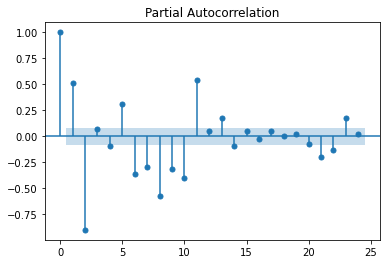

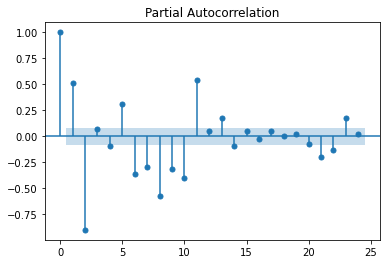

In [108]:
#PACF
smt.graphics.plot_pacf(ln_electricity, lags = 24, method='ols')

In [109]:
#Based on PACF - you can find the value of p =1, P=1

In [110]:
#Box-Jenkins process - helps to get approximate values of p,d,q 

#using above p,d,q values, we will come up with ranges to check which value is best value

#Model = SARIMA
#Model input time series = np.log(data.Electricty_Consumption_in_TW)
#(p,d,q) = (1,2,1)
#(P,D,Q,T) = (1,0,1,12)

In [111]:
train = np.log(data.Electricty_Consumption_in_TW)[:'2019-01-01']
test = np.log(data.Electricty_Consumption_in_TW)['2019-02-01':]

In [112]:
train

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2018-09-01    4.638673
2018-10-01    4.550177
2018-11-01    4.520787
2018-12-01    4.624858
2019-01-01    4.717177
Name: Electricty_Consumption_in_TW, Length: 553, dtype: float64

In [113]:
test

DATE
2019-02-01    4.578067
2019-03-01    4.541598
2019-04-01    4.490739
2019-05-01    4.580734
2019-06-01    4.708250
2019-07-01    4.804852
2019-08-01    4.802187
2019-09-01    4.697923
Name: Electricty_Consumption_in_TW, dtype: float64

In [114]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [115]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  553
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                1285.289
Date:                            Sun, 10 Oct 2021   AIC                          -2560.578
Time:                                    17:51:22   BIC                          -2539.148
Sample:                                01-01-1973   HQIC                         -2552.195
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0971      0.044     -2.188      0.029      -0.184      -0.010
ma.L1         -1.0000     20.527   

In [116]:
f_cast = np.exp(model.forecast(8))

In [117]:
act = np.exp(test)
act

DATE
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [118]:
print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.026261217875387606


In [119]:
pred = np.exp(model.fittedvalues)['2018-01-01':]
act = np.exp(np.log(data.Electricty_Consumption_in_TW))['2018-01-01': '2019-01-01']

In [120]:
print('train_error_last1year:', np.mean(np.abs(act-pred)/act))

train_error_last1year: 0.023951030240875363


In [121]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [122]:
best_results = auto_arima(np.log(data.Electricty_Consumption_in_TW),  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-1238.5110123342886
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-1556.8995683958988
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-1641.364493097098
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-1934.7097500602101
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-2121.063845692679
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:-2075.2625879084253
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-1967.9124463206467
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-2174.4709900560138
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-2121.6305211009794
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-1982.0537813054862
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-2116.111191831048
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:-2075.004938016575
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-1989.6730564620188
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-2123.2594532882263
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-2122.9091065398807
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-2006.787264157167
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-2082.161204442978
SAR

SARIMAX(2, 2, 1)x(2, 1, 0, 12)12 - AIC:-2447.3427470460274
SARIMAX(2, 2, 1)x(2, 1, 1, 12)12 - AIC:-2514.7208575571367
SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:-2508.419911113748
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:-1960.4494028747135
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:-2121.2972029049965
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:-2131.494988698961
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:-2425.8326338093475
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:-2590.2263962932866
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:-2494.407377395429
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:-2427.2672975651294
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:-2638.6393289124276
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:-2571.554303473083
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-2445.6596519977065
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:-2535.355663522985
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:-2511.6181686099244
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-2462.9239322077
SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:-2563.118819687791
SARIMA

In [123]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (2,2,2), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:         Electricty_Consumption_in_TW   No. Observations:                  553
Model:             SARIMAX(2, 2, 2)x(1, 0, [1], 12)   Log Likelihood                1309.362
Date:                              Sun, 10 Oct 2021   AIC                          -2604.723
Time:                                      18:40:56   BIC                          -2574.734
Sample:                                  01-01-1973   HQIC                         -2592.991
                                       - 01-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5215      0.066      7.911      0.000       0.392       0.651
ar.L2         -0.11

In [124]:
f_cast = np.exp(model.forecast(8))

In [125]:
act = np.exp(test)

In [126]:
print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.02010644760443061


In [127]:
pred = np.exp(model.fittedvalues)['2018-01-01':]
act = np.exp(np.log(data.Electricty_Consumption_in_TW))['2018-01-01': '2019-01-01']

In [128]:
print('train_error_last1year:', np.mean(np.abs(act-pred)/act))

train_error_last1year: 0.024884156192696558


In [129]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(np.log(data.Electricty_Consumption_in_TW), order = (2,2,2), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [130]:
f_cast = np.exp(model.forecast(27))
f_cast

2019-10-01     96.541282
2019-11-01     93.913075
2019-12-01    104.167838
2020-01-01    110.513512
2020-02-01    101.237836
2020-03-01     96.693141
2020-04-01     90.430079
2020-05-01     96.760419
2020-06-01    111.635513
2020-07-01    123.340495
2020-08-01    122.440432
2020-09-01    109.235989
2020-10-01     96.338511
2020-11-01     93.955678
2020-12-01    104.365744
2021-01-01    110.748404
2021-02-01    101.349851
2021-03-01     96.748467
2021-04-01     90.422635
2021-05-01     96.799215
2021-06-01    111.804344
2021-07-01    123.618692
2021-08-01    122.696904
2021-09-01    109.348838
2021-10-01     96.326537
2021-11-01     93.914965
2021-12-01    104.402690
Freq: MS, Name: predicted_mean, dtype: float64

In [131]:
data.Electricty_Consumption_in_TW

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

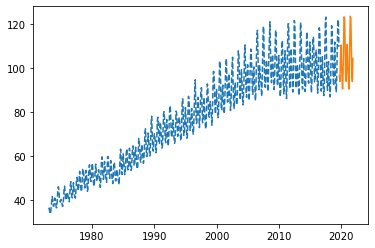

In [132]:
import matplotlib.pyplot as plt
plt.plot(data.Electricty_Consumption_in_TW, '--', label='obs')
plt.plot(f_cast, '-', label=f_cast)

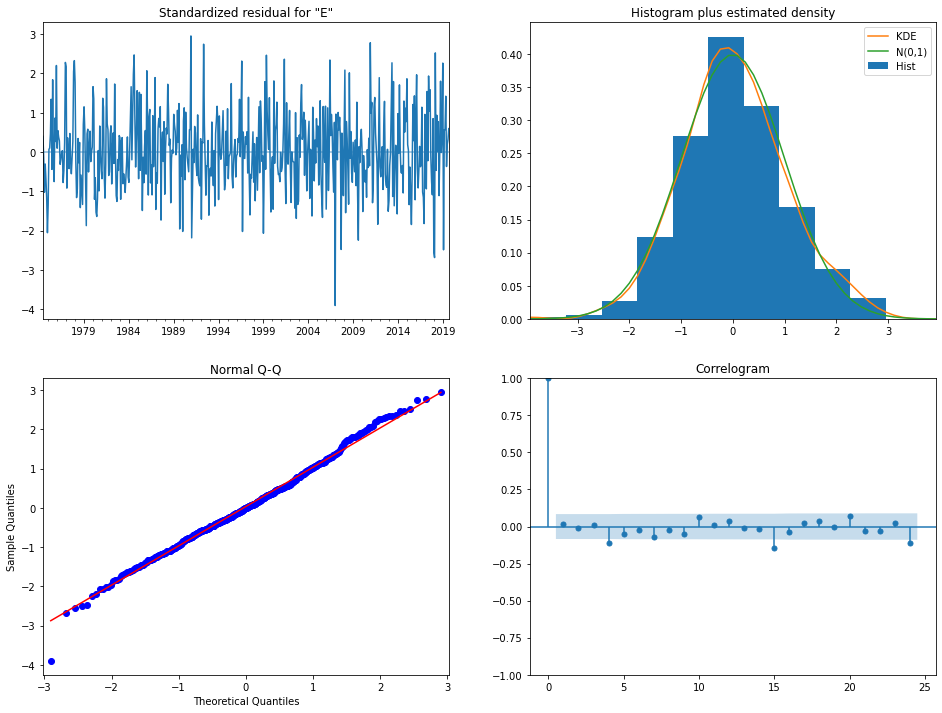

In [133]:
model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

#Errors should follow normal distribution
#ACF of Errors - Error series should be white noise/random walk- There is no auto correlation among errors